

# 911 WRPS Calls Data Final Project_Konsur


The Final Project the description of the dataset, the main 911 Waterloo Regional Police Service (WRPS) data sources in (*.csv) format and represents with more than 170806 insidents with 23 feature listed below.
All properties of incidents are continuous variables, and Final_Priority (Severity) is an ordinal, dependent variable
http://www.wrps.on.ca/sites/default/files/WRPSOccurrenceData_Year_2014_October_15.csv

The data contains the following fields:

* Occurrence Number
* Geographic Location [long, lat]
* Nearest Intersection Location
* Patrol Division
* Patrol Zone
* Municipality
* Reported [Date and Time]
* Initial Call Type (REMOVED)
* Initial Call Type Description
* Final Call Type
* Final Call Type Description
* Initial Priority (Removed)
* Final Priority [1-9]
* Disposition (Removed)
* Dispatch [Date and Time]
* Arrival [Date and Time]
* Cleared [Date and Time]
* Call Dispatch Delay = Dispath - Reported
* Call Travel Time = Arrival - Dispatch
* Call On-Scene Time = Cleared - Arrived
* Call Response Time = Arrival - Reported
* Call Service Time = Cleared - Dispatch
* Total Unit Service Time = ?????


Note: -- installing nn on my computer (from conda prompt):
conda update scikit-learn followed by: pip install scikit-neuralnetwork

## Data and Setup

____
** Import numpy and pandas **

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [20]:
from multiprocessing import Process, freeze_support
from pylab import rcParams
from scipy import stats
from sklearn import tree
from sklearn import datasets, linear_model, preprocessing
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

** Read in the csv file as a dataframe called df **

In [21]:
path='data\\WRPSOccurrenceData_Year_2015_November3_2016.csv'

In [22]:
df=pd.read_csv(path)
df.head(3)

,Occurrence Number,Geographic Location,Nearest Intersection Location,Patrol Division,Patrol Zone,Municipality,Reported Date and Time,Initial Call Type,Initial Call Type Description,Final Call Type,...,Disposition,Dispatch Date and Time,Arrival Date and Time,Cleared Date and Time,Call Dispatch Delay,Call Travel Time,Call On-Scene Time,Call Response Time,Call Service Time,Total Unit Service Time
0,WA15168339,"537724.704700 ,4816634.248000",KING ST N / NORTHFIELD DR E / NORTHFIELD DR W,WN,WN6,NaN,2015-08-08 12:00:00,NaN,NaN,9960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WA15274061,"552814.080200 ,4804681.021100",MONTROSE ST N / RAILWAY ST,WS,WS6,CAM,2015-12-24 12:15:17,9250.0,9250-ALARM,9250.0,...,NR,2015-12-24 16:04:49,2015-12-24 16:10:19,2015-12-24 16:14:57,13772.0,330.0,278.0,14102.0,608.0,608.0
2,WA15240889,"543979.878500 ,4805604.983000",BEASLEY DR / HOMER WATSON BLVD,WC,WC7,KIT,2015-11-09 13:19:15,9830.0,9830-VEHICLE STOP,9830.0,...,NR,2015-11-09 13:19:20,2015-11-09 13:19:21,2015-11-09 13:35:54,5.0,1.0,993.0,6.0,994.0,994.0


** Check the info() of the df **

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280141 entries, 0 to 280140
Data columns (total 23 columns):
Occurrence Number                280141 non-null object
Geographic Location              275947 non-null object
Nearest Intersection Location    275947 non-null object
Patrol Division                  279233 non-null object
Patrol Zone                      275594 non-null object
Municipality                     185449 non-null object
Reported Date and Time           280141 non-null object
Initial Call Type                186435 non-null float64
Initial Call Type Description    186435 non-null object
Final Call Type                  280138 non-null float64
Final Call Type Description      280138 non-null object
Initial Priority                 186435 non-null float64
Final Priority                   280139 non-null float64
Disposition                      186452 non-null object
 Dispatch Date and Time          186468 non-null object
Arrival Date and Time            176577 non-n

** Check the head of df **

In [24]:
df1=df.dropna()


In [25]:
df1.shape

(170806, 23)

In [26]:
df1.reset_index(drop=True)
df1.head(5)

,Occurrence Number,Geographic Location,Nearest Intersection Location,Patrol Division,Patrol Zone,Municipality,Reported Date and Time,Initial Call Type,Initial Call Type Description,Final Call Type,...,Disposition,Dispatch Date and Time,Arrival Date and Time,Cleared Date and Time,Call Dispatch Delay,Call Travel Time,Call On-Scene Time,Call Response Time,Call Service Time,Total Unit Service Time
1,WA15274061,"552814.080200 ,4804681.021100",MONTROSE ST N / RAILWAY ST,WS,WS6,CAM,2015-12-24 12:15:17,9250.0,9250-ALARM,9250.0,...,NR,2015-12-24 16:04:49,2015-12-24 16:10:19,2015-12-24 16:14:57,13772.0,330.0,278.0,14102.0,608.0,608.0
2,WA15240889,"543979.878500 ,4805604.983000",BEASLEY DR / HOMER WATSON BLVD,WC,WC7,KIT,2015-11-09 13:19:15,9830.0,9830-VEHICLE STOP,9830.0,...,NR,2015-11-09 13:19:20,2015-11-09 13:19:21,2015-11-09 13:35:54,5.0,1.0,993.0,6.0,994.0,994.0
3,WA15171651,"556059.710500 ,4802351.015300",COULSON ST / ELMWOOD AVE,WS,WS4,CAM,2015-08-13 07:38:07,9250.0,9250-ALARM,9250.0,...,NR,2015-08-13 07:38:26,2015-08-13 07:42:56,2015-08-13 08:00:48,19.0,270.0,1072.0,289.0,1342.0,2815.0
4,WA15200283,"541176.033600 ,4810854.312200",CHARLES ST W / ONTARIO ST S,WC,WC1,KIT,2015-09-18 14:30:35,9220.0,9220-MISSING PERSON,9220.0,...,NR,2015-09-18 14:47:55,2015-09-18 14:48:04,2015-09-18 14:59:01,1040.0,9.0,657.0,1049.0,666.0,666.0
6,WA15162132,"538320.095900 ,4814442.414200",COLUMBIA ST E / COLUMBIA ST W / KING ST N,W3,324,WAT,2015-07-31 07:01:43,9830.0,9830-VEHICLE STOP,9830.0,...,NR,2015-07-31 07:01:43,2015-07-31 07:01:44,2015-07-31 10:07:31,0.0,1.0,11147.0,1.0,11148.0,1715.0


In [27]:
df1.shape

(170806, 23)

In [28]:
df1 = df1.drop('Disposition', 1)
df1 = df1.drop('Initial Priority', 1)

In [29]:
df1 = df1.drop('Initial Call Type', 1)


In [30]:
df1 = df1.drop('Initial Call Type Description',1)

In [31]:
df1.shape

(170806, 19)

In [32]:
df1.head(5)

,Occurrence Number,Geographic Location,Nearest Intersection Location,Patrol Division,Patrol Zone,Municipality,Reported Date and Time,Final Call Type,Final Call Type Description,Final Priority,Dispatch Date and Time,Arrival Date and Time,Cleared Date and Time,Call Dispatch Delay,Call Travel Time,Call On-Scene Time,Call Response Time,Call Service Time,Total Unit Service Time
1,WA15274061,"552814.080200 ,4804681.021100",MONTROSE ST N / RAILWAY ST,WS,WS6,CAM,2015-12-24 12:15:17,9250.0,9250-ALARM,3.0,2015-12-24 16:04:49,2015-12-24 16:10:19,2015-12-24 16:14:57,13772.0,330.0,278.0,14102.0,608.0,608.0
2,WA15240889,"543979.878500 ,4805604.983000",BEASLEY DR / HOMER WATSON BLVD,WC,WC7,KIT,2015-11-09 13:19:15,9830.0,9830-VEHICLE STOP,7.0,2015-11-09 13:19:20,2015-11-09 13:19:21,2015-11-09 13:35:54,5.0,1.0,993.0,6.0,994.0,994.0
3,WA15171651,"556059.710500 ,4802351.015300",COULSON ST / ELMWOOD AVE,WS,WS4,CAM,2015-08-13 07:38:07,9250.0,9250-ALARM,3.0,2015-08-13 07:38:26,2015-08-13 07:42:56,2015-08-13 08:00:48,19.0,270.0,1072.0,289.0,1342.0,2815.0
4,WA15200283,"541176.033600 ,4810854.312200",CHARLES ST W / ONTARIO ST S,WC,WC1,KIT,2015-09-18 14:30:35,9220.0,9220-MISSING PERSON,2.0,2015-09-18 14:47:55,2015-09-18 14:48:04,2015-09-18 14:59:01,1040.0,9.0,657.0,1049.0,666.0,666.0
6,WA15162132,"538320.095900 ,4814442.414200",COLUMBIA ST E / COLUMBIA ST W / KING ST N,W3,324,WAT,2015-07-31 07:01:43,9830.0,9830-VEHICLE STOP,7.0,2015-07-31 07:01:43,2015-07-31 07:01:44,2015-07-31 10:07:31,0.0,1.0,11147.0,1.0,11148.0,1715.0


In [33]:
df1.columns = [c.replace(' ', '_') for c in df1.columns]

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170806 entries, 1 to 280140
Data columns (total 19 columns):
Occurrence_Number                170806 non-null object
Geographic_Location              170806 non-null object
Nearest_Intersection_Location    170806 non-null object
Patrol_Division                  170806 non-null object
Patrol_Zone                      170806 non-null object
Municipality                     170806 non-null object
Reported_Date_and_Time           170806 non-null object
Final_Call_Type                  170806 non-null float64
Final_Call_Type_Description      170806 non-null object
Final_Priority                   170806 non-null float64
_Dispatch_Date_and_Time          170806 non-null object
Arrival_Date_and_Time            170806 non-null object
Cleared_Date_and_Time            170806 non-null object
Call_Dispatch_Delay              170806 non-null float64
Call_Travel_Time                 170806 non-null float64
Call_On-Scene_Time               170806 non-n

In [35]:
df1['Reason'] = df1['Final_Call_Type_Description'].apply(lambda Final_Call_Type_Description: Final_Call_Type_Description.split('-')[1])

In [36]:
df1['Reason'].value_counts()

VEHICLE STOP                                    41624
COMPASSIONATE TO LOCATE                         12589
BYLAW COMPLAINT                                  8460
THEFT UNDER $5000                                6132
SELECTIVE TRAFFIC ENFORCEMENT PROGRAM (STEP)     5957
DOMESTIC DISPUTE                                 5610
ADMINISTRATIVE/ROUTINE DETAIL                    5599
PROACTIVE INITIATIVE/PROJECT                     5583
UNWANTED PERSON                                  5525
MVC PROP. DAMAGE                                 4874
DRIVING COMPLAINT                                4591
PERSON STOP                                      4067
ALARM                                            3465
INJURED/SICK PERSON                              3457
DISPUTE                                          3425
DOMESTIC OTHER                                   2691
ARREST                                           2470
SUSPICIOUS PERSON                                2350
PROP. (LOST AND FOUND)      

** What are the top 5 Patrol Zones for 911 calls? **

In [37]:
df1['Patrol_Zone'].value_counts().head(5)

WS4    10229
WN6     9935
WC2     9508
WC5     9341
WS2     9315
Name: Patrol_Zone, dtype: int64

In [38]:
df1['Patrol_Division'].value_counts().head(5)

WN    62662
WC    59070
WS    47492
WR      275
W2      232
Name: Patrol_Division, dtype: int64

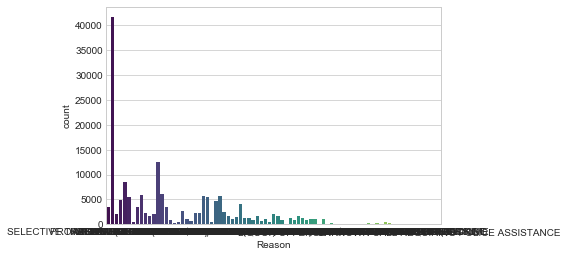

In [39]:
sns.countplot(x='Reason',data=df1,palette='viridis')

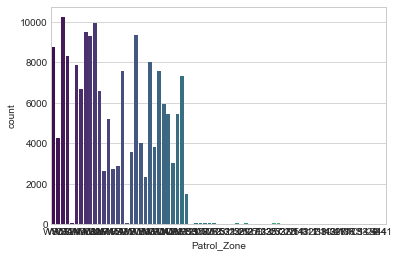

In [40]:
sns.countplot(x='Patrol_Zone',data=df1,palette='viridis')

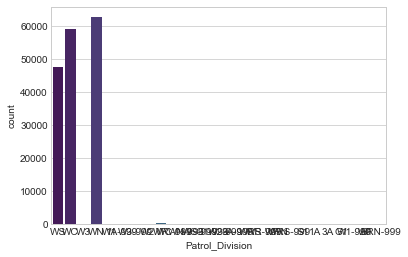

In [41]:
sns.countplot(x='Patrol_Division',data=df1,palette='viridis')

Y:  Recoding target variable: If 'Final Priority' >= 7, then 1, else 0.

In [42]:
df1.shape

(170806, 20)

In [43]:
df1.columns

Index(['Occurrence_Number', 'Geographic_Location',
       'Nearest_Intersection_Location', 'Patrol_Division', 'Patrol_Zone',
       'Municipality', 'Reported_Date_and_Time', 'Final_Call_Type',
       'Final_Call_Type_Description', 'Final_Priority',
       '_Dispatch_Date_and_Time', 'Arrival_Date_and_Time',
       'Cleared_Date_and_Time', 'Call_Dispatch_Delay', 'Call_Travel_Time',
       'Call_On-Scene_Time', 'Call_Response_Time', 'Call_Service_Time',
       'Total_Unit_Service_Time', 'Reason'],
      dtype='object')

In [44]:
Y = df1.Final_Priority.values

In [45]:
df1 = df1.drop('Final_Priority', axis=1)
X = df1.as_matrix()
X_cols = df1.columns[0:11]
Y = np.asarray([1 if i>=7 else 0 for i in Y])

In [46]:
X.shape

(170806, 19)

In [47]:
Y.shape

(170806,)

In [48]:
X[:,12:17]

array([[13772.0, 330.0, 278.0, 14102.0, 608.0],
       [5.0, 1.0, 993.0, 6.0, 994.0],
       [19.0, 270.0, 1072.0, 289.0, 1342.0],
       ...,
       [19403.0, 433.0, 1188.0, 19836.0, 1621.0],
       [227.0, 717.0, 3633.0, 944.0, 4350.0],
       [36.0, 7.0, 7564.0, 43.0, 7571.0]], dtype=object)

In [49]:
X2=X[:,12:17]

In [50]:
df1.head(5)

,Occurrence_Number,Geographic_Location,Nearest_Intersection_Location,Patrol_Division,Patrol_Zone,Municipality,Reported_Date_and_Time,Final_Call_Type,Final_Call_Type_Description,_Dispatch_Date_and_Time,Arrival_Date_and_Time,Cleared_Date_and_Time,Call_Dispatch_Delay,Call_Travel_Time,Call_On-Scene_Time,Call_Response_Time,Call_Service_Time,Total_Unit_Service_Time,Reason
1,WA15274061,"552814.080200 ,4804681.021100",MONTROSE ST N / RAILWAY ST,WS,WS6,CAM,2015-12-24 12:15:17,9250.0,9250-ALARM,2015-12-24 16:04:49,2015-12-24 16:10:19,2015-12-24 16:14:57,13772.0,330.0,278.0,14102.0,608.0,608.0,ALARM
2,WA15240889,"543979.878500 ,4805604.983000",BEASLEY DR / HOMER WATSON BLVD,WC,WC7,KIT,2015-11-09 13:19:15,9830.0,9830-VEHICLE STOP,2015-11-09 13:19:20,2015-11-09 13:19:21,2015-11-09 13:35:54,5.0,1.0,993.0,6.0,994.0,994.0,VEHICLE STOP
3,WA15171651,"556059.710500 ,4802351.015300",COULSON ST / ELMWOOD AVE,WS,WS4,CAM,2015-08-13 07:38:07,9250.0,9250-ALARM,2015-08-13 07:38:26,2015-08-13 07:42:56,2015-08-13 08:00:48,19.0,270.0,1072.0,289.0,1342.0,2815.0,ALARM
4,WA15200283,"541176.033600 ,4810854.312200",CHARLES ST W / ONTARIO ST S,WC,WC1,KIT,2015-09-18 14:30:35,9220.0,9220-MISSING PERSON,2015-09-18 14:47:55,2015-09-18 14:48:04,2015-09-18 14:59:01,1040.0,9.0,657.0,1049.0,666.0,666.0,MISSING PERSON
6,WA15162132,"538320.095900 ,4814442.414200",COLUMBIA ST E / COLUMBIA ST W / KING ST N,W3,324,WAT,2015-07-31 07:01:43,9830.0,9830-VEHICLE STOP,2015-07-31 07:01:43,2015-07-31 07:01:44,2015-07-31 10:07:31,0.0,1.0,11147.0,1.0,11148.0,1715.0,VEHICLE STOP


In [51]:
#Creating train and test set.
np.random.seed(2)
X_train, X_test, Y_train, Y_test = train_test_split(X2[1:1000,:], Y[1:1000], train_size=0.7)

 I'll standardize the features so that they are centered around 0 with a standard deviation of 1.

In [52]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Quick test of multiple models with cross validation

In [53]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = ExtraTreesClassifier()


In [54]:
for clf, label in zip([clf1, clf2, clf3, clf4],
 ['Logistic Regression', 'Random Forest', 'Naive Bayes','Extra Trees']):
 scores = cross_validation.cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
 print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.87 (+/- 0.03) [Logistic Regression]
Accuracy: 0.92 (+/- 0.03) [Random Forest]
Accuracy: 0.54 (+/- 0.06) [Naive Bayes]
Accuracy: 0.89 (+/- 0.03) [Extra Trees]


In [55]:
clf6 = GradientBoostingClassifier()
clf7 = tree.DecisionTreeClassifier()


In [56]:
for clf, label in zip([clf6, clf7],
 ['Gradient Boosting', 'Decision Tree']):
 scores = cross_validation.cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
 print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std()*2, label))

Accuracy: 0.92 (+/- 0.07) [Gradient Boosting]
Accuracy: 0.90 (+/- 0.06) [Decision Tree]


In [57]:
clf5 = SVC()
clf5

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
for clf, label in zip([clf5],
 ['SVM']):
 scores = cross_validation.cross_val_score(clf, X_train, Y_train, cv=2, scoring='accuracy')
 print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.80 (+/- 0.01) [SVM]


Gradient Boosting, Random Forest and Extra trees performs the best, while naive bayes performs the worst. I will drop Logistic Regression and Naive Bayes and will analyze the following models: Decision Tree, Random Forest, Gradient Boosting, SVM, and Extra Trees. Decision Tree

DecisionTree Classifier with default parameters

In [59]:
dt = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10)
dt.fit(X_train, Y_train)
dt_test_preds = dt.predict_proba(X_test)[:, 1]


In [60]:
dt_preds = dt.predict(X_test)
print (pd.crosstab(index=Y_test, columns=dt_preds, rownames=["Actual"], colnames=["Pred"]))

Pred      0   1
Actual         
0       175  16
1        14  95


In [61]:
dt_roc = roc_auc_score(Y_test, dt_test_preds)
dt_roc

0.9094577069023488

In [62]:
fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree = roc_curve(Y_test, dt_test_preds)

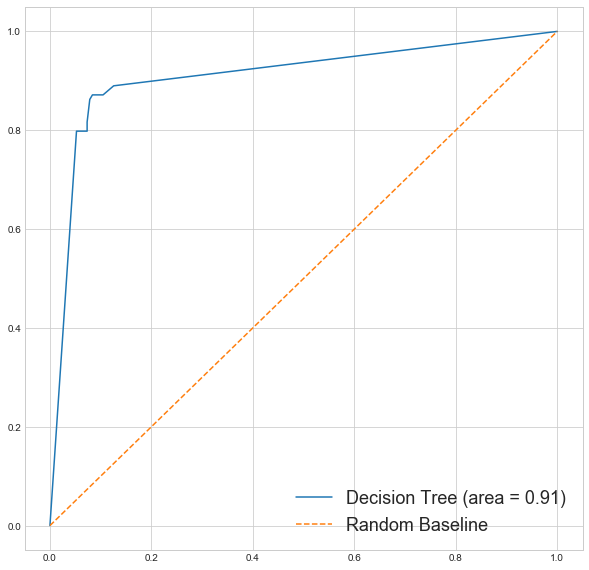

In [63]:
fpr_rand = tpr_rand = np.linspace(0, 1, 10)
rcParams['figure.figsize'] = 10, 10
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree (area = %0.2f)' % dt_roc)
plt.plot(fpr_rand, tpr_rand, linestyle='--', label='Random Baseline')
plt.legend(loc='lower right', prop={'size':18})
plt.show()

Random Forest Random Forest Classifier with default parameters

In [64]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_test_preds = rf.predict_proba(X_test)[:, 1]

In [65]:
rf_preds = rf.predict(X_test)
print (pd.crosstab(index=Y_test, columns=rf_preds, rownames=["Actual"], colnames=["Pred"]))

Pred      0    1
Actual          
0       177   14
1         9  100


In [66]:
rf_roc = roc_auc_score(Y_test, rf_test_preds)
roc_auc_score(Y_test, rf_test_preds)

0.9478841442912724

In [67]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, rf_test_preds)

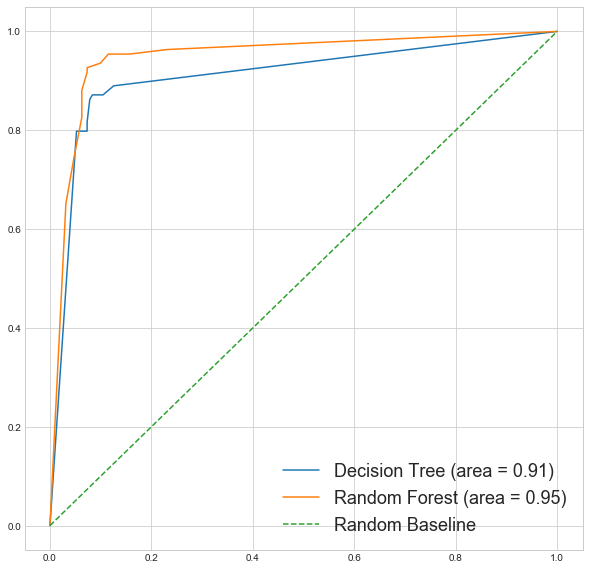

In [68]:
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree (area = %0.2f)' % dt_roc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % rf_roc)
plt.plot(fpr_rand, tpr_rand, linestyle='--', label='Random Baseline')
plt.legend(loc='lower right',prop={'size':18})
plt.show()

*Random Forest Classifier feature importance

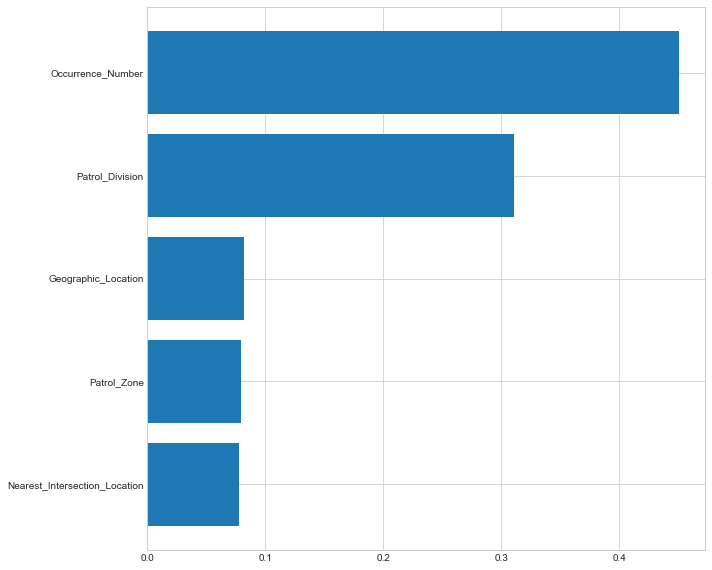

In [69]:
rf_importances = rf.feature_importances_
sorted_indices = np.argsort(rf_importances)
y_pos = range(len(rf_importances))
plt.barh(y_pos, rf_importances[sorted_indices], align='center')
plt.yticks(y_pos, X_cols[sorted_indices])
plt.show()

In [70]:
scores = []

In [71]:
for val in range(1,10):
 rf = RandomForestClassifier(n_estimators = val)
 validated = cross_val_score(rf, X_train, Y_train, cv=10)
 scores.append(validated)

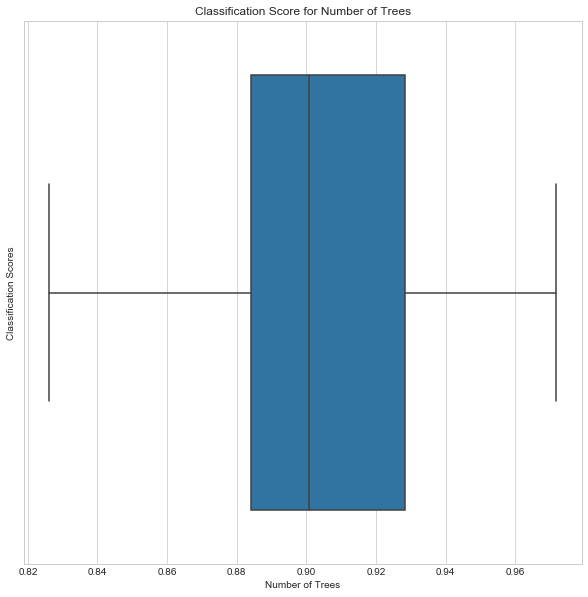

In [72]:
sns.boxplot(scores)
plt.xlabel('Number of Trees')
plt.ylabel('Classification Scores')
plt.title('Classification Score for Number of Trees')
plt.show()

The classification score increases as the number of trees increase but it stadystate at 10.

In [73]:
param_grid = {"n_estimators": [5,19,26],
 "max_depth": [3,4,5,6,7,None],
 "max_features": ['auto',None],
 "min_samples_split": [1,3,5,10],
 "min_samples_leaf": [1,3,5,10]}

In [74]:
rf_ml = RandomForestClassifier()

In [75]:
#grid_search = GridSearchCV(rf_ml, param_grid=param_grid, cv=5)
#grid_search.fit(X_train, Y_train)
#print (grid_search.best_params_)
#{'max_features': 'auto', 'min_samples_split': 1, 'n_estimators': 19, 'max_depth': None,
#'min_samples_leaf': 1}

In [76]:
rf_custom = RandomForestClassifier(n_estimators=19, max_depth=None, max_features='auto',
 min_samples_split=2, min_samples_leaf=2)
rf_custom.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features='auto', max_leaf_nodes=None,
min_samples_leaf=1, min_samples_split=1,
min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
oob_score=False, random_state=None, verbose=0,
warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
rf_custom_preds = rf_custom.predict(X_test)
print (pd.crosstab(Y_test, rf_custom_preds, rownames=["Actual"], colnames=["Pred"]))

Pred      0    1
Actual          
0       177   14
1         8  101


In [79]:
rf_custom_test_preds = rf_custom.predict_proba(X_test)[:, 1]
rf_custom_roc = roc_auc_score(Y_test, rf_custom_test_preds)
roc_auc_score(Y_test, rf_custom_test_preds)

0.9548489360680148

In [80]:
fpr_rf_custom, tpr_rf_custom, thresholds_rf_custom = roc_curve(Y_test, rf_custom_test_preds)

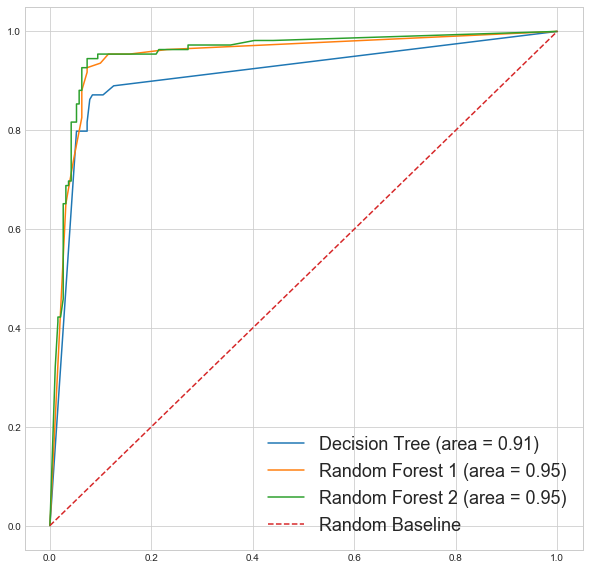

In [81]:
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree (area = %0.2f)' % dt_roc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest 1 (area = %0.2f)' % rf_roc)
plt.plot(fpr_rf_custom, tpr_rf_custom, label='Random Forest 2 (area = %0.2f)' % rf_custom_roc)
plt.plot(fpr_rand, tpr_rand, linestyle='--', label='Random Baseline')
plt.legend(loc='lower right', prop={'size':18})
plt.show()

Gradient Boosting Classifier

In [82]:
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, max_depth=5)

In [83]:
gbc.fit(X_train, Y_train)
gbc_test_preds = gbc.predict_proba(X_test)[:, 1]

In [84]:
gbc_test_preds = gbc.predict_proba(X_test)[:, 1]
gbc_preds = gbc.predict(X_test)

In [85]:
print (pd.crosstab(index=Y_test, columns=gbc_preds, rownames=['True'], colnames=['Predicted']))

Predicted    0   1
True              
0          176  15
1           15  94


In [86]:
gbc_roc = roc_auc_score(Y_test, gbc_test_preds)
roc_auc_score(Y_test, gbc_test_preds)

0.9519429367404775

In [87]:
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(Y_test, gbc_test_preds)

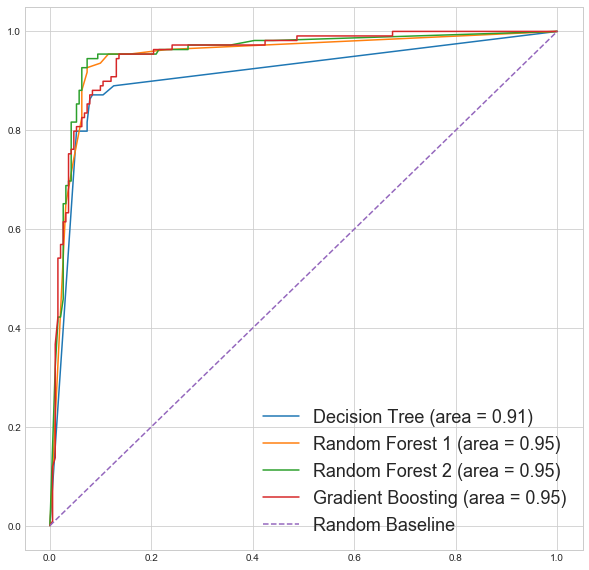

In [88]:
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree (area = %0.2f)' % dt_roc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest 1 (area = %0.2f)' % rf_roc)
plt.plot(fpr_rf_custom, tpr_rf_custom, label='Random Forest 2 (area = %0.2f)' % rf_custom_roc)
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting (area = %0.2f)' % gbc_roc)
plt.plot(fpr_rand, tpr_rand, linestyle='--', label='Random Baseline')
plt.legend(loc='lower right', prop={'size':18})
plt.show()

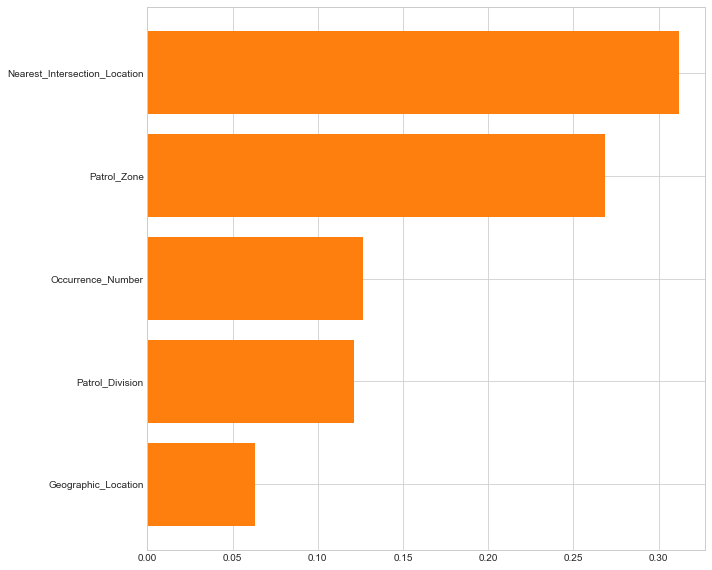

In [89]:
gbc_importances = gbc.feature_importances_
sorted_indices = np.argsort(gbc_importances)
y_pos = range(len(gbc_importances))
plt.barh(y_pos, gbc_importances[sorted_indices], align='center')
plt.barh(y_pos, gbc_importances[sorted_indices], align='center')
plt.yticks(y_pos, X_cols[sorted_indices])
plt.show()

Support Vector Machine (SVM)

In [90]:
clf = SVC(C=1.0, probability=True)
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
X_train.shape

(699, 5)

In [92]:
Y_train.shape

(699,)

In [93]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, kernel='rbf', max_iter=-1, 
    probability=True, random_state=None,
shrinking=True, tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
svm_test_preds = clf.predict_proba(X_test)[:, 1]
svm_preds = clf.predict(X_test)

In [96]:
print (pd.crosstab(index=Y_test, columns=svm_preds, rownames=['True'], colnames=['Predicted']))

Predicted    0   1
True              
0          160  31
1           11  98


In [97]:
svm_roc = roc_auc_score(Y_test, svm_test_preds)
roc_auc_score(Y_test, svm_test_preds)

0.9383976175608819

In [98]:
fpr_svm, tpr_smv, thresholds_smv = roc_curve(Y_test, svm_test_preds)

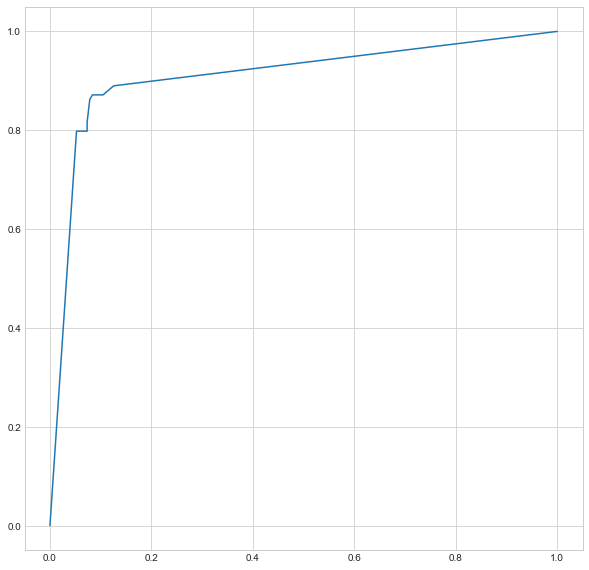

In [99]:
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree (area = %0.2f)' % dt_roc)

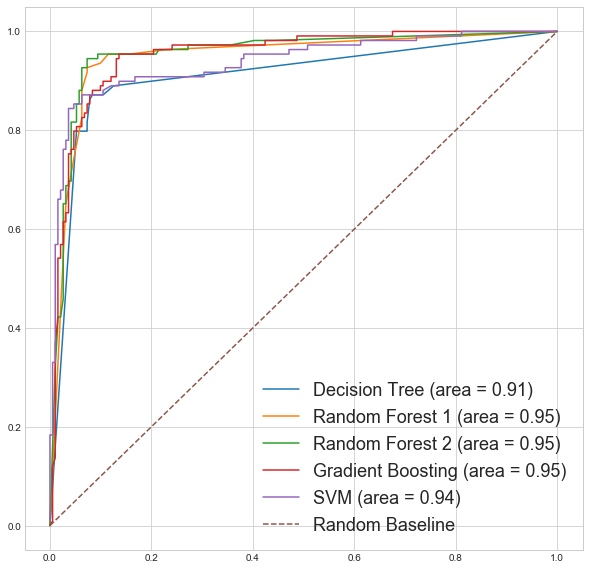

In [100]:
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree (area = %0.2f)' % dt_roc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest 1 (area = %0.2f)' % rf_roc)
plt.plot(fpr_rf_custom, tpr_rf_custom, label='Random Forest 2 (area = %0.2f)' % rf_custom_roc)
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting (area = %0.2f)' % gbc_roc)
plt.plot(fpr_svm, tpr_smv, label='SVM (area = %0.2f)' % svm_roc)
plt.plot(fpr_rand, tpr_rand, linestyle='--', label='Random Baseline')
plt.legend(loc='lower right', prop={'size':18})
plt.show()

Which feature is most important? 

Extra Tree Clasifier

In [101]:
et = ExtraTreesClassifier(n_estimators=500)

In [102]:
et.fit(X_train, Y_train)
et_test_preds = et.predict_proba(X_test)[:, 1]
et_preds = et.predict(X_test)


In [103]:
print (pd.crosstab(index=Y_test, columns=et_preds, rownames=['True'], colnames=['Predicted']))

Predicted    0   1
True              
0          177  14
1           14  95


In [104]:
fpr_et, tpr_et, thresholds_et = roc_curve(Y_test, et_test_preds)

In [105]:
et_roc = roc_auc_score(Y_test, et_test_preds)
roc_auc_score(Y_test, et_test_preds)

0.9562418944233633

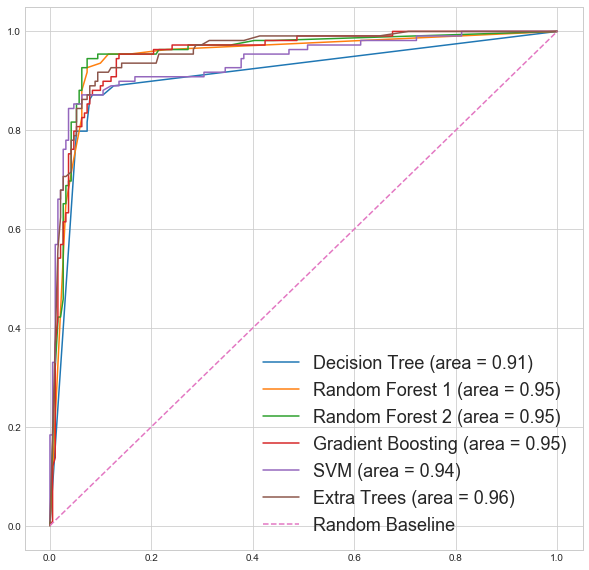

In [106]:
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree (area = %0.2f)' % dt_roc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest 1 (area = %0.2f)' % rf_roc)
plt.plot(fpr_rf_custom, tpr_rf_custom, label='Random Forest 2 (area = %0.2f)' % rf_custom_roc)
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting (area = %0.2f)' % gbc_roc)
plt.plot(fpr_svm, tpr_smv, label='SVM (area = %0.2f)' % svm_roc)
plt.plot(fpr_et, tpr_et, label='Extra Trees (area = %0.2f)' % et_roc)
plt.plot(fpr_rand, tpr_rand, linestyle='--', label='Random Baseline')
plt.legend(loc='lower right', prop={'size':18})
plt.show()

In [107]:
#neural network clasificer
clfnn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clfnn.fit(X_train, Y_train)
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
nn_test_preds = clfnn.predict_proba(X_test)[:, 1]
nn_preds = clfnn.predict(X_test)
print (pd.crosstab(index=Y_test, columns=nn_preds, rownames=['True'], colnames=['Predicted']))

Predicted    0   1
True              
0          180  11
1           11  98


In [108]:
nn_roc = roc_auc_score(Y_test, nn_test_preds)
roc_auc_score(Y_test, nn_test_preds)


0.9569623901244056

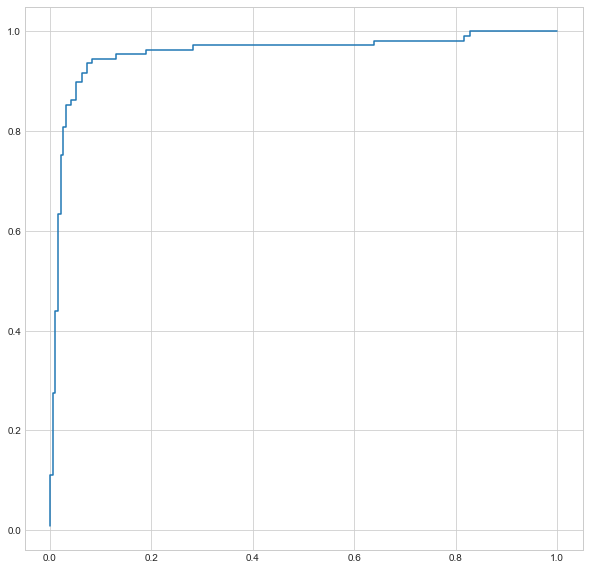

In [109]:
fpr_nn, tpr_nn, thresholds_nn = roc_curve(Y_test, nn_test_preds)
plt.plot(fpr_nn, tpr_nn, label='NN (area = %0.2f)' % nn_roc)


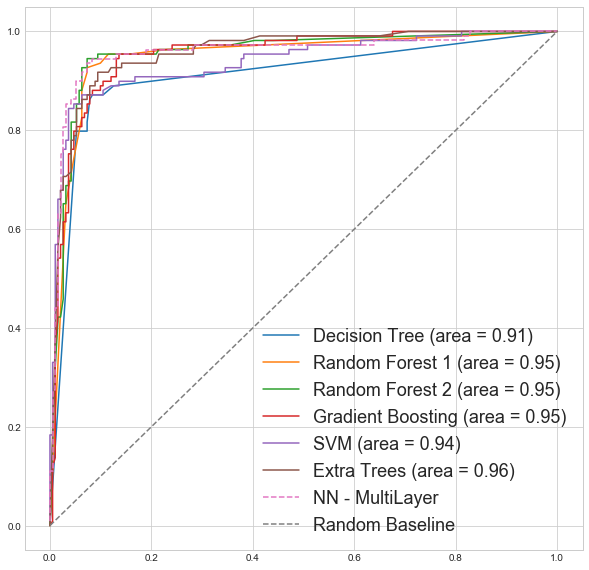

In [110]:
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree (area = %0.2f)' % dt_roc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest 1 (area = %0.2f)' % rf_roc)
plt.plot(fpr_rf_custom, tpr_rf_custom, label='Random Forest 2 (area = %0.2f)' % rf_custom_roc)
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting (area = %0.2f)' % gbc_roc)
plt.plot(fpr_svm, tpr_smv, label='SVM (area = %0.2f)' % svm_roc)
plt.plot(fpr_et, tpr_et, label='Extra Trees (area = %0.2f)' % et_roc)
plt.plot(fpr_nn, tpr_nn, linestyle='--', label='NN - MultiLayer')
plt.plot(fpr_rand, tpr_rand, linestyle='--', label='Random Baseline')
plt.legend(loc='lower right', prop={'size':18})
plt.show()

Model ROC Summary

In [111]:
print("ROC: %0.3f (Decision Tree)" % (dt_roc))
print("ROC: %0.3f (Random Forest - Default Parameters)" % (rf_roc))
print("ROC: %0.3f (Random Forest - Custom Parameters)" % (rf_custom_roc))
print("ROC: %0.3f (Gradient Boosting)" % (gbc_roc))
print("ROC: %0.3f (SVM)" % (svm_roc))
print("ROC: %0.3f (Extra Trees)" % (et_roc))
print("ROC: %0.3f (NN MultiLayer)" % (nn_roc))

ROC: 0.909 (Decision Tree)
ROC: 0.948 (Random Forest - Default Parameters)
ROC: 0.955 (Random Forest - Custom Parameters)
ROC: 0.952 (Gradient Boosting)
ROC: 0.938 (SVM)
ROC: 0.956 (Extra Trees)
ROC: 0.957 (NN MultiLayer)


Based on the above ROC, NN Multilayer is the preferred model to predict the Severity of the incient 